In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [14]:

data=pd.read_csv("/Users/anoop.sharma/Downloads/OPTIDX_BANKNIFTY_CE_02-04-2020_TO_16-04-2020.csv")


data_pe=pd.read_csv("/Users/anoop.sharma/Downloads/OPTIDX_BANKNIFTY_PE_02-04-2020_TO_16-04-2020.csv")
data_pe.head(1)

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,03-Apr-2020,23-Apr-2020,PE,33100,0.0,0.0,0.0,2212.1,0.0,15767.55,0,0.0,0.0,0,0,17249.3


In [15]:
data_ce=data.groupby(['Date','Strike Price'],as_index=False).agg({'Open Int':'sum','Change in OI':'sum'})
# data_pe=data_pe.groupby('Date',as_index=False).agg({'Open Int':'sum','Change in OI':'sum'})

data_ce['Date']=pd.to_datetime(data_ce.Date)
# data_ce.sort_values('Date',ascending=False)
data_ce


,Date,Strike Price,Open Int,Change in OI
0,2020-04-03,13900,0,0
1,2020-04-03,14000,0,0
2,2020-04-03,14100,0,0
3,2020-04-03,14200,0,0
4,2020-04-03,14300,0,0
...,...,...,...,...
1402,2020-04-16,33500,0,0
1403,2020-04-16,33600,0,0
1404,2020-04-16,33700,0,0
1405,2020-04-16,33800,0,0


In [16]:
data_pe['Date']=pd.to_datetime(data_pe.Date)
data_pe.sort_values('Date',ascending=False)

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
1406,BANKNIFTY,2020-04-16,23-Apr-2020,PE,20200,1079.95,1251.0,1050.0,1050.00,1050.0,1050.00,5,21.32,1.12,60,60,19400.0
1269,BANKNIFTY,2020-04-16,23-Apr-2020,PE,32100,0.00,0.0,0.0,1506.05,0.0,12671.40,0,0.00,0.00,0,0,19400.0
1279,BANKNIFTY,2020-04-16,23-Apr-2020,PE,20300,0.00,0.0,0.0,609.45,0.0,1423.10,0,0.00,0.00,0,0,19400.0
1278,BANKNIFTY,2020-04-16,23-Apr-2020,PE,33000,0.00,0.0,0.0,2137.10,0.0,13570.60,0,0.00,0.00,0,0,19400.0
1277,BANKNIFTY,2020-04-16,23-Apr-2020,PE,32900,0.00,0.0,0.0,2062.00,0.0,13470.70,0,0.00,0.00,0,0,19400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,BANKNIFTY,2020-04-03,23-Apr-2020,PE,26200,0.00,0.0,0.0,45.30,0.0,8919.60,0,0.00,0.00,0,0,17249.3
131,BANKNIFTY,2020-04-03,23-Apr-2020,PE,26100,0.00,0.0,0.0,39.80,0.0,8821.60,0,0.00,0.00,0,0,17249.3
130,BANKNIFTY,2020-04-03,23-Apr-2020,PE,26000,0.00,0.0,0.0,136.25,0.0,8723.65,0,0.00,0.00,0,0,17249.3
129,BANKNIFTY,2020-04-03,23-Apr-2020,PE,25900,0.00,0.0,0.0,124.70,0.0,8625.85,0,0.00,0.00,0,0,17249.3


In [17]:
newDS=data_ce.join(data_pe,lsuffix='_CE',rsuffix='_PE').sort_values('Date_CE',ascending=False)
newDS

,Date_CE,Strike Price_CE,Open Int_CE,Change in OI_CE,Symbol,Date_PE,Expiry,Option Type,Strike Price_PE,Open,...,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int_PE,Change in OI_PE,Underlying Value
1406,2020-04-16,33900,0,0,BANKNIFTY,2020-04-16,23-Apr-2020,PE,20200,1079.95,...,1050.0,1050.00,1050.0,1050.00,5,21.32,1.12,60,60,19400.0
1269,2020-04-16,20200,0,0,BANKNIFTY,2020-04-16,23-Apr-2020,PE,32100,0.00,...,0.0,1506.05,0.0,12671.40,0,0.00,0.00,0,0,19400.0
1279,2020-04-16,21200,0,0,BANKNIFTY,2020-04-16,23-Apr-2020,PE,20300,0.00,...,0.0,609.45,0.0,1423.10,0,0.00,0.00,0,0,19400.0
1278,2020-04-16,21100,0,0,BANKNIFTY,2020-04-16,23-Apr-2020,PE,33000,0.00,...,0.0,2137.10,0.0,13570.60,0,0.00,0.00,0,0,19400.0
1277,2020-04-16,21000,88760,46680,BANKNIFTY,2020-04-16,23-Apr-2020,PE,32900,0.00,...,0.0,2062.00,0.0,13470.70,0,0.00,0.00,0,0,19400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2020-04-03,27100,0,0,BANKNIFTY,2020-04-03,23-Apr-2020,PE,26200,0.00,...,0.0,45.30,0.0,8919.60,0,0.00,0.00,0,0,17249.3
131,2020-04-03,27000,0,0,BANKNIFTY,2020-04-03,23-Apr-2020,PE,26100,0.00,...,0.0,39.80,0.0,8821.60,0,0.00,0.00,0,0,17249.3
130,2020-04-03,26900,0,0,BANKNIFTY,2020-04-03,23-Apr-2020,PE,26000,0.00,...,0.0,136.25,0.0,8723.65,0,0.00,0.00,0,0,17249.3
129,2020-04-03,26800,0,0,BANKNIFTY,2020-04-03,23-Apr-2020,PE,25900,0.00,...,0.0,124.70,0.0,8625.85,0,0.00,0.00,0,0,17249.3


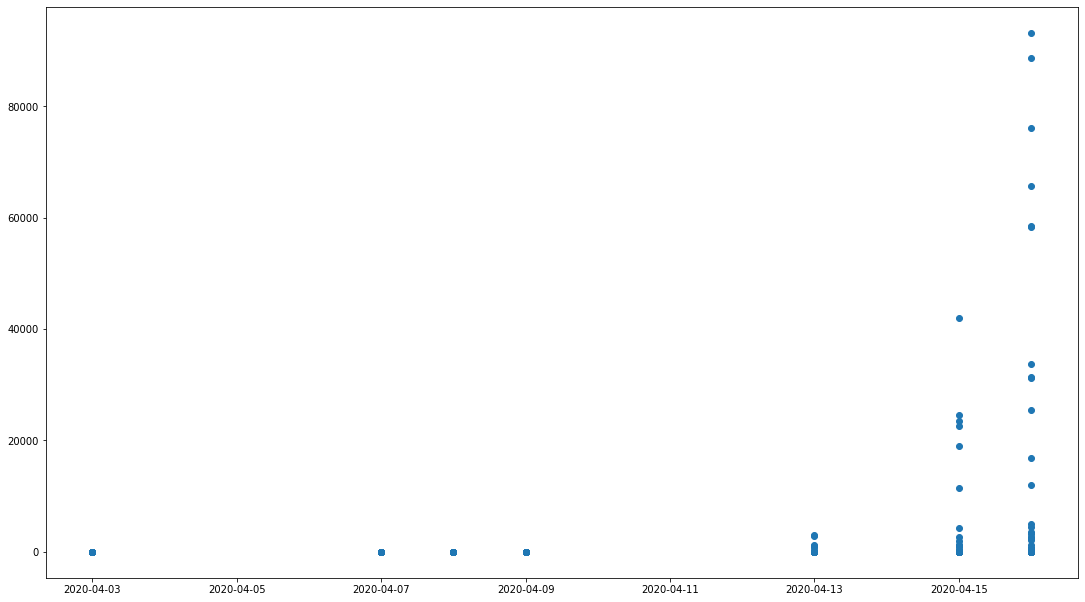

In [18]:


dates = matplotlib.dates.date2num(data_ce['Date'])
plt.plot_date(dates,data_ce['Open Int'],)
# plt.plot_date(dates,newDS['Change in OI_CE'])

# plt.plot_date(dates,newDS['Open Int_PE'])
# plt.plot_date(dates,newDS['Change in OI_PE'])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


No handles with labels found to put in legend.


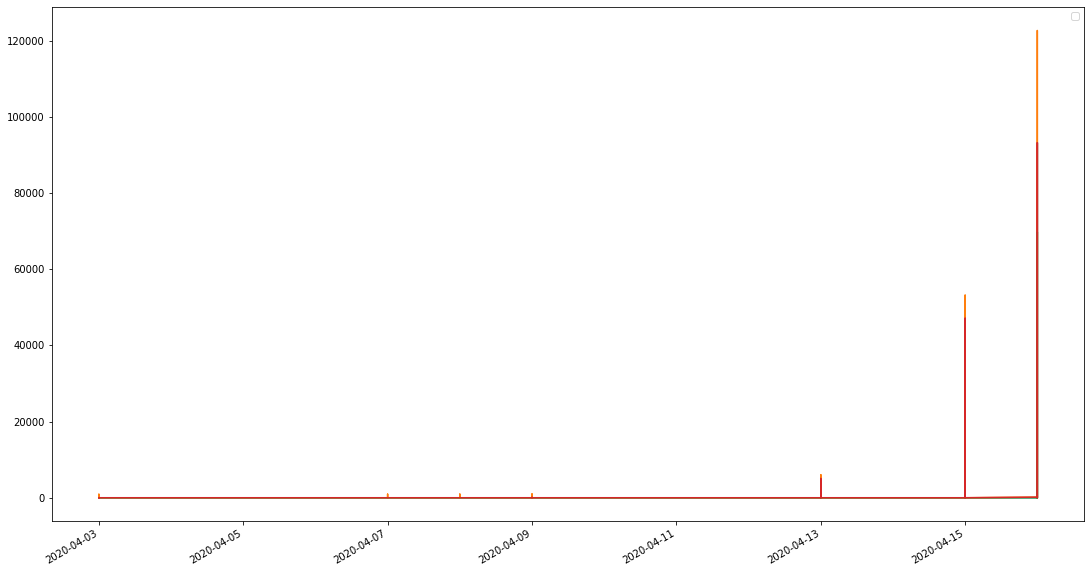

In [19]:
dates = newDS['Date_CE']
# y=newDS['Open Int_CE']
plt.plot(dates,newDS['Open Int_CE'])
plt.plot(dates,newDS['Open Int_PE'])

plt.plot(dates,newDS['Change in OI_CE'])
plt.plot(dates,newDS['Change in OI_PE'])


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()


<Figure size 432x288 with 0 Axes>

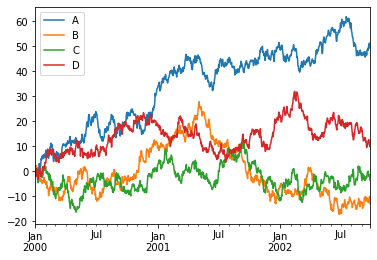

In [20]:
ts = pd.Series(np.random.randn(1000),
          index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4),
                   index=ts.index, columns=list('ABCD'))

df = df.cumsum()

plt.figure();

df.plot();


In [21]:
ts = pd.Series(np.random.randn(1000),
          index=pd.date_range('1/1/2000', periods=1000))
ts
np.random.randn(1000, 4).shape

(1000, 4)